# Etude du jeu de données Breast Cancer Wisconsin (Diagnostic)

By Dimitri Nseng - Apprentissage Statistique

# Import packages

In [57]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Data description

In [58]:
headers = ["Id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", 
           "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean",
           "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se",
           "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", 
           "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", 
           "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]
print("Number of attributs :", len(headers))

Number of attributs : 32


In [59]:
data = pd.read_csv('~/Documents/Master-2021/Machine-Learning/Projet/Etude_jeu_de_donnees/data/wdbc.csv', 
                   header = None)
data.head(2)

0  1      2      3      4       5        6        7       8        9   \
0  842302  M  17.99  10.38  122.8  1001.0  0.11840  0.27760  0.3001  0.14710   
1  842517  M  20.57  17.77  132.9  1326.0  0.08474  0.07864  0.0869  0.07017   

   ...     22     23     24      25      26      27      28      29      30  \
0  ...  25.38  17.33  184.6  2019.0  0.1622  0.6656  0.7119  0.2654  0.4601   
1  ...  24.99  23.41  158.8  1956.0  0.1238  0.1866  0.2416  0.1860  0.2750   

        31  
0  0.11890  
1  0.08902  

[2 rows x 32 columns]

The dataset doesn't have headers names, let's add them as following

In [60]:
data = pd.read_csv('~/Documents/Master-2021/Machine-Learning/Projet/Etude_jeu_de_donnees/data/wdbc.csv', 
                   na_values='?', header=None, index_col=['Id'], names = headers) 
data.head(2)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
Id                                                                       
842302         M        17.99         10.38           122.8     1001.0   
842517         M        20.57         17.77           132.9     1326.0   

        smoothness_mean  compactness_mean  concavity_mean  \
Id                                                          
842302          0.11840           0.27760          0.3001   
842517          0.08474           0.07864          0.0869   

        concave points_mean  symmetry_mean  ...  radius_worst  texture_worst  \
Id                                          ...                                
842302              0.14710         0.2419  ...         25.38          17.33   
842517              0.07017         0.1812  ...         24.99          23.41   

        perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
Id                                                                         
842302            184.6      2019.0            0.1622             0.6656   
842517            158.8      1956.0            0.1238             0.1866   

        concavity_worst  concave points_worst  symmetry_worst  \
Id                                                              
842302           0.7119                0.2654          0.4601   
842517           0.2416                0.1860          0.2750   

        fractal_dimension_worst  
Id                               
842302                  0.11890  
842517                  0.08902  

[2 rows x 31 columns]

In [61]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
print("The shape of our dataset: " + str(data.shape))
print("The shape of X: " + str(X.shape))
print("The shape of y: " + str(y.shape))

The shape of our dataset: (569, 31)
The shape of X: (569, 30)
The shape of y: (569,)


Let's show the dataset information and check for missing values

In [62]:
data.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

Quick glimpse of tumor features in relation to diagnosis

In [63]:
data.groupby('diagnosis').mean()

radius_mean  texture_mean  perimeter_mean   area_mean  \
diagnosis                                                          
B            12.146524     17.914762       78.075406  462.790196   
M            17.462830     21.604906      115.365377  978.376415   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                      
B                 0.092478          0.080085        0.046058   
M                 0.102898          0.145188        0.160775   

           concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
diagnosis                                                              ...   
B                     0.025717       0.174186                0.062867  ...   
M                     0.087990       0.192909                0.062680  ...   

           radius_worst  texture_worst  perimeter_worst   area_worst  \
diagnosis                                                              
B             13.379801      23.515070        87.005938   558.899440   
M             21.134811      29.318208       141.370330  1422.286321   

           smoothness_worst  compactness_worst  concavity_worst  \
diagnosis                                                         
B                  0.124959           0.182673         0.166238   
M                  0.144845           0.374824         0.450606   

           concave points_worst  symmetry_worst  fractal_dimension_worst  
diagnosis                                                                 
B                      0.074444        0.270246                 0.079442  
M                      0.182237        0.323468                 0.091530  

[2 rows x 30 columns]

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [65]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

It seems that there is no missing values in the dataset.

Visualizing the missing values using missingo

#pip install missingno

# Exploratory Data analysis

Checking for imbalance 

B    357
M    212
Name: diagnosis, dtype: int64


/home/nseng/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


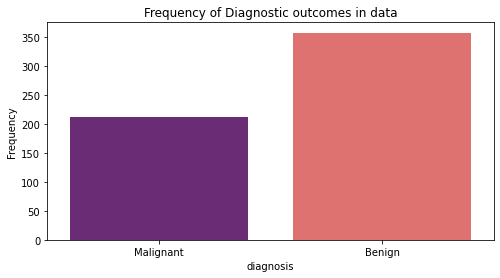

In [66]:
diagnosis_count = data['diagnosis'].value_counts()
print(diagnosis_count)

plt.figure(figsize=(8,4))
a = sns.countplot(data['diagnosis'], data = data, palette = 'magma')
a.set_xticklabels(['Malignant','Benign'])
a.set_title("Frequency of Diagnostic outcomes in data")
plt.ylabel("Frequency")
plt.show()
#plt.savefig('diagnosis.png')

We can also compute the percentage of benign and malignant to compare them

In [67]:
diagnosis_count = data.diagnosis.value_counts()
diagnosis_count = pd.Series(diagnosis_count)
diagnosis_count = pd.DataFrame(diagnosis_count)
diagnosis_count.index = ['Benign', 'Malignant']

diagnosis_count['Percent'] = 100*diagnosis_count['diagnosis']/sum(diagnosis_count['diagnosis'])
diagnosis_count['Percent'] = diagnosis_count['Percent'].round().astype('int')

print('The Percentage of tumors classified as \'malignant\' in this dataset is: {}'.format(100*float(data.diagnosis.value_counts()[1])/float((len(data)))))
print('\nA good classifier should therefore outperform blind guessing knowing the proportions i.e. > 62% accuracy')
diagnosis_count

The Percentage of tumors classified as 'malignant' in this dataset is: 37.25834797891037

A good classifier should therefore outperform blind guessing knowing the proportions i.e. > 62% accuracy


diagnosis  Percent
Benign           357       63
Malignant        212       37

Various ranges of feature values

<AxesSubplot:title={'center':'Various ranges of feature values'}>

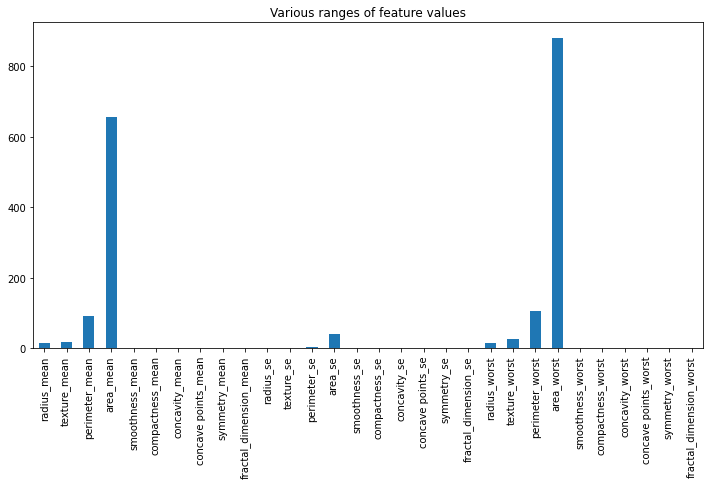

In [68]:
data_mean = data.describe().loc['mean']
data_mean.plot(kind='bar', figsize = (12,6), title = 'Various ranges of feature values')


# Data Preprocessing

- Split data into training (80%) and test (20%) sets
- Normalize data to account for feature scaling
- Encode diagnosis
- Attributes selection

In [69]:
#X = data.drop(columns = {'diagnosis', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se','fractal_dimension_se', 'fractal_dimension_worst'})
X = data.drop(columns = {'diagnosis'})
y = data['diagnosis']

In [70]:
X.shape

(569, 30)

In [71]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

We encode diagnosis.


Note that the value for M -- 1 | B -- 0

In [72]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder().fit(y)
y = encoder.transform(y)

Spliting the dataset to training set(80%) and testing set(20%)

In [73]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,random_state=42)

print('Shape of the training set:'+" "+str(X_train.shape))
print('Size of the training set:'+" "+str(X_train.shape[0]))

print('Shape of the testing set:'+" "+str(X_test.shape))
print('Size of the testing set:'+" "+str(X_test.shape[0]))

Shape of the training set: (455, 30)
Size of the training set: 455
Shape of the testing set: (114, 30)
Size of the testing set: 114


In [74]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# Meme transformation sur le test
X_test = scaler.transform(X_test)

# Building models 

We'll start by testing a variety of algorithms using scikit-learn

We begin by no preprocessing data in order to compare the models performances with the ones built on preprocessing the data.

LogisticRegression 

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [76]:
# Optimisation du paramètre de pénalisation
# grille de valeurs
param=[{"C":list(range(1,15))}]
LR = GridSearchCV(LogisticRegression(), param,cv=5,n_jobs=-1)
LROpt=LR.fit(X_train, y_train)  # GridSearchCV est lui même un estimateur
# paramètre optimal
LROpt.best_params_["C"]
print("Meilleur score : %.2f%%\nMeilleur paramètre : %s" % ((1.-LROpt.best_score_)*100,LROpt.best_params_))

Meilleur score : 2.20%
Meilleur paramètre : {'C': 3}


In [77]:
# erreur sur l'échantillon test
print("Erreur échantillon test : %.2f%%"% ((1-LROpt.score(X_test, y_test))*100))
print("Test accuracy: %.2f%%" % (LROpt.score(X_test, y_test)*100))

Erreur échantillon test : 2.63%
Test accuracy: 97.37%


In [78]:
# Prévision
y_pred= LROpt.predict(X_test)

In [79]:
class_label=['benign','malignant']
from sklearn.metrics import classification_report
classification_report(y_true=y_test,y_pred=y_pred 
                      ,output_dict = True,target_names=class_label)

{'benign': {'precision': 0.9722222222222222,
  'recall': 0.9859154929577465,
  'f1-score': 0.979020979020979,
  'support': 71},
 'malignant': {'precision': 0.9761904761904762,
  'recall': 0.9534883720930233,
  'f1-score': 0.9647058823529412,
  'support': 43},
 'accuracy': 0.9736842105263158,
 'macro avg': {'precision': 0.9742063492063492,
  'recall': 0.9697019325253848,
  'f1-score': 0.97186343068696,
  'support': 114},
 'weighted avg': {'precision': 0.9737190197716513,
  'recall': 0.9736842105263158,
  'f1-score': 0.9736214250146138,
  'support': 114}}

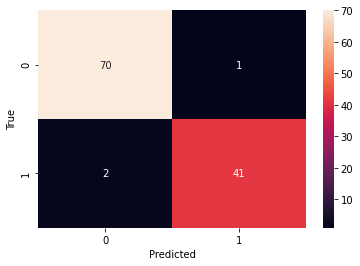

In [80]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(matrix,annot=True )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

DecisionTreeClassifier

In [81]:
from sklearn.tree import DecisionTreeClassifier
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(X_train, y_train)
# paramètre optimal
print("Meilleur score : %.2f%%\nMeilleur paramètre = %s" % ((1.- treeOpt.best_score_,treeOpt.best_params_)))

Meilleur score : 0.06%
Meilleur paramètre = {'max_depth': 3}


In [82]:
# Estimation de l'erreur de prévision
print("Erreur sur le Test: %.2f%%" % (1-treeOpt.score(X_test,y_test)))
print("Test accuracy: %.2f%%" % (treeOpt.score(X_test, y_test)*100))

Erreur sur le Test: 0.06%
Test accuracy: 93.86%


In [83]:
# prévision de l'échantillon test
y_pred = treeOpt.predict(X_test)


In [84]:
classification_report(y_true=y_test,y_pred=y_pred
                      ,output_dict = True,target_names=class_label)

{'benign': {'precision': 0.9444444444444444,
  'recall': 0.9577464788732394,
  'f1-score': 0.951048951048951,
  'support': 71},
 'malignant': {'precision': 0.9285714285714286,
  'recall': 0.9069767441860465,
  'f1-score': 0.9176470588235294,
  'support': 43},
 'accuracy': 0.9385964912280702,
 'macro avg': {'precision': 0.9365079365079365,
  'recall': 0.9323616115296429,
  'f1-score': 0.9343480049362403,
  'support': 114},
 'weighted avg': {'precision': 0.938457254246728,
  'recall': 0.9385964912280702,
  'f1-score': 0.9384499917007656,
  'support': 114}}

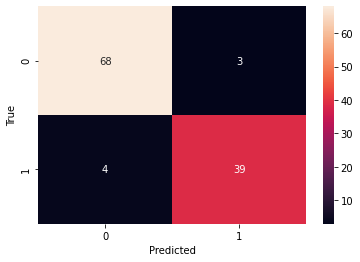

In [85]:
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(matrix,annot=True )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [86]:
from sklearn.tree import export_graphviz
from six import StringIO  
import pydotplus
treeG=DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(X_train,y_train)
dot_data = StringIO() 
export_graphviz(treeG, out_file=dot_data) 
graph=pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png("treeOpt.png")

True

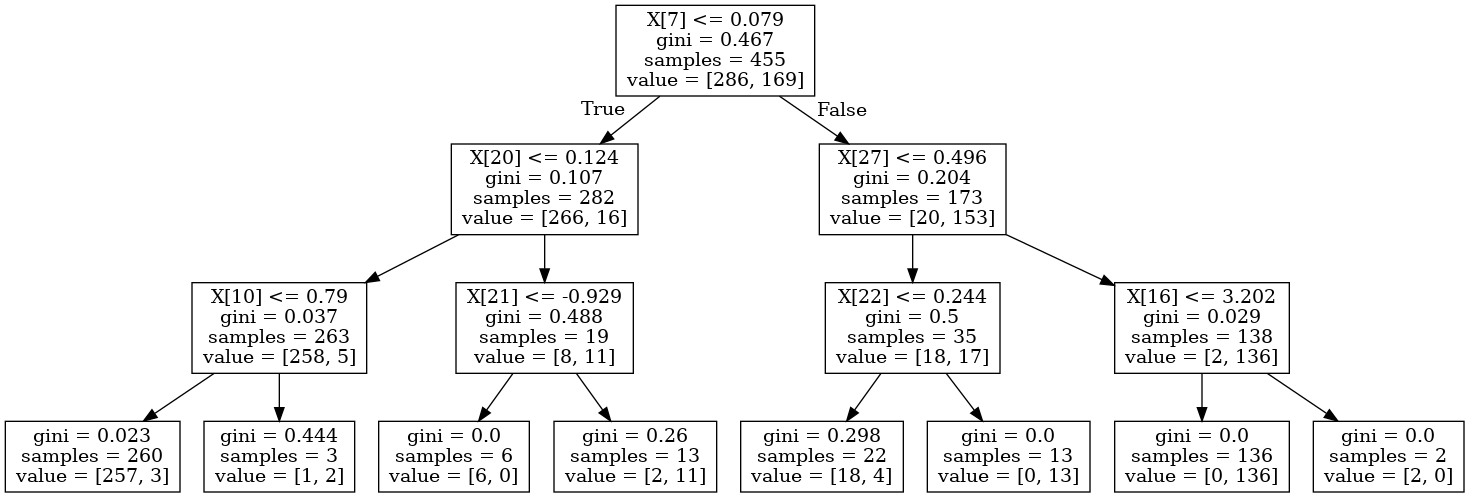

In [87]:
from IPython.display import Image
Image(filename='treeOpt.png')

RandomForestClassifier

In [88]:
from sklearn.ensemble import RandomForestClassifier 
# définition des paramètres
forest = RandomForestClassifier(n_estimators=500, 
   criterion='gini', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(X_train,y_train)
print(1-rfFit.oob_score_)

0.03516483516483515


In [89]:
# erreur de prévision sur le test
1-rfFit.score(X_test,y_test)
print("Test accuracy: %.2f%%" % (rfFit.score(X_test, y_test)*100))

Test accuracy: 96.49%


In [90]:
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestClassifier(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(X_train, y_train)
# paramètre optimal
print("Meilleur score = %f\nMeilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.039560
Meilleur paramètre = {'max_features': 6}


In [91]:
# erreur de prévision sur le test
1-rfOpt.score(X_test,y_test)
print("Test accuracy: %.2f%%" % (rfOpt.score(X_test, y_test)*100))

Test accuracy: 96.49%


In [92]:
# prévision
y_pred = rfFit.predict(X_test)

In [93]:
classification_report(y_true=y_test,y_pred=y_pred
                      ,output_dict = True,target_names=class_label)

{'benign': {'precision': 0.958904109589041,
  'recall': 0.9859154929577465,
  'f1-score': 0.9722222222222222,
  'support': 71},
 'malignant': {'precision': 0.975609756097561,
  'recall': 0.9302325581395349,
  'f1-score': 0.9523809523809524,
  'support': 43},
 'accuracy': 0.9649122807017544,
 'macro avg': {'precision': 0.9672569328433009,
  'recall': 0.9580740255486406,
  'f1-score': 0.9623015873015873,
  'support': 114},
 'weighted avg': {'precision': 0.9652053622194477,
  'recall': 0.9649122807017544,
  'f1-score': 0.9647382344750767,
  'support': 114}}

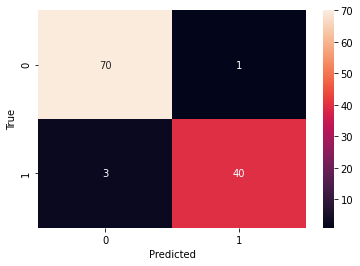

In [94]:
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(matrix,annot=True )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

il est possible de calculer un indicateur d'importance des variables pour aider à une forme d'interprétation. Celui-ci dépend de la position de la variable dans l'arbre et correspond donc au mean decrease in Gini index. La forêt doit être réestimée car GridSearch ne connaît pas le paramètre d'importance.

In [95]:
rf= RandomForestClassifier(n_estimators=100,max_features=2)
rfFit=rf.fit(X_train, y_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print(data.columns[indices[f]], importances[indices[f]])

texture_worst 0.11043895679957418
fractal_dimension_se 0.08890935975748931
perimeter_worst 0.08029641379679277
concavity_mean 0.06815442201130552
concavity_worst 0.06682741817450794
compactness_worst 0.06641768925171668
diagnosis 0.058064624340614275
texture_mean 0.05027782580689675
perimeter_mean 0.03694881344226622
fractal_dimension_mean 0.03569533923208323
perimeter_se 0.034903156090383324
smoothness_mean 0.034405808474378095
radius_worst 0.03263180839226695
area_worst 0.028714727148803618
compactness_mean 0.027485247805886955
smoothness_worst 0.02703880477091222
texture_se 0.02163691133226916
concave points_worst 0.020513480365579092
radius_mean 0.019454435416884998
area_mean 0.010878201569968982
compactness_se 0.010841667778655792
smoothness_se 0.010065111870713104
symmetry_mean 0.008826384497746519
symmetry_worst 0.008566387861922934
concavity_se 0.008000230706140731
concave points_se 0.0076942644938057725
radius_se 0.007172951366480942
symmetry_se 0.006974478486973234
concave po

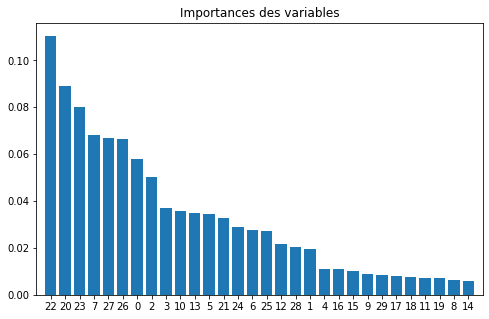

In [96]:
# Graphe des importances
plt.figure(figsize=(8,5))
plt.title("Importances des variables")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

SVM - Linear

L'optimisation du paramètre C est recherchée sur une grille par validation croisée. 

In [97]:
from sklearn.svm import SVC
param=[{"C":[0.4,0.5,0.6,0.8,1,1.4]}]
svm= GridSearchCV(SVC(probability=True),param,cv=10,n_jobs=-1)
svmOpt=svm.fit(X_train, y_train)
# paramètre optimal
print("Meilleur score = %.2f%%\nMeilleur paramètre = %s" % (1. - svmOpt.best_score_,svmOpt.best_params_))

Meilleur score = 0.03%
Meilleur paramètre = {'C': 0.5}


In [98]:
# erreur de prévision sur le test
1-svmOpt.score(X_test,y_test)
print("Test accuracy: %.2f%%" % (svmOpt.score(X_test, y_test)*100))

Test accuracy: 96.49%


In [99]:
# prévision de l'échantillon test
y_pred = svmOpt.predict(X_test)

In [100]:
classification_report(y_true=y_test,y_pred=y_pred
                      ,output_dict = True,target_names=class_label)

{'benign': {'precision': 0.958904109589041,
  'recall': 0.9859154929577465,
  'f1-score': 0.9722222222222222,
  'support': 71},
 'malignant': {'precision': 0.975609756097561,
  'recall': 0.9302325581395349,
  'f1-score': 0.9523809523809524,
  'support': 43},
 'accuracy': 0.9649122807017544,
 'macro avg': {'precision': 0.9672569328433009,
  'recall': 0.9580740255486406,
  'f1-score': 0.9623015873015873,
  'support': 114},
 'weighted avg': {'precision': 0.9652053622194477,
  'recall': 0.9649122807017544,
  'f1-score': 0.9647382344750767,
  'support': 114}}

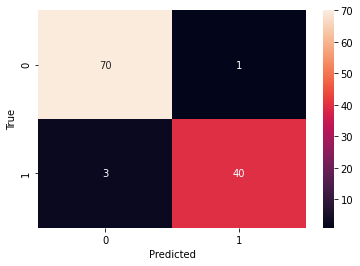

In [101]:
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(matrix,annot=True )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

MultiLayer Perceptron 

In [102]:
from sklearn.neural_network import MLPClassifier


Définition des paramètres dont le nombre de neurones. Le nombre max d'itérations par défaut (200) semble insuffisant. Il est fixé à 500.

In [103]:
param_grid=[{"hidden_layer_sizes":list([(5,),(6,),(7,),(8,), (9,), (10,)])}]
nnet= GridSearchCV(MLPClassifier(max_iter=500),param_grid,cv=10,n_jobs=-1)
nnetOpt=nnet.fit(X_train, y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))

Meilleur score = 0.019758, Meilleur paramètre = {'hidden_layer_sizes': (10,)}


In [104]:
# Estimation de l'erreur de prévision sur le test
1-nnetOpt.score(X_test,y_test)
print("Test accuracy: %.2f%%" % (nnetOpt.score(X_test, y_test)*100))

Test accuracy: 99.12%


In [105]:
# prévision de l'échantillon test
y_pred = nnetOpt.predict(X_test)

In [106]:
classification_report(y_true=y_test,y_pred=y_pred
                      ,output_dict = True,target_names=class_label)

{'benign': {'precision': 0.9861111111111112,
  'recall': 1.0,
  'f1-score': 0.993006993006993,
  'support': 71},
 'malignant': {'precision': 1.0,
  'recall': 0.9767441860465116,
  'f1-score': 0.988235294117647,
  'support': 43},
 'accuracy': 0.9912280701754386,
 'macro avg': {'precision': 0.9930555555555556,
  'recall': 0.9883720930232558,
  'f1-score': 0.99062114356232,
  'support': 114},
 'weighted avg': {'precision': 0.991349902534113,
  'recall': 0.9912280701754386,
  'f1-score': 0.991207141671538,
  'support': 114}}

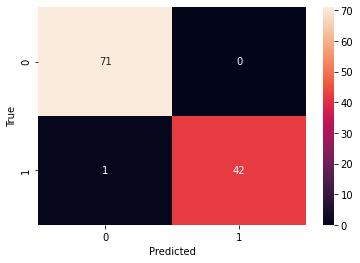

In [107]:
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(matrix,annot=True )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# comparaison des méthodes

## courbe ROC

Dans toute méthode, la prévision de dépassement ou non est associée au choix d'un seuil qui est par défaut 0.5. L'optimisaiton de ce seuil dépend des coûts respectifs associés aux faux positifs et aux faux négatifs qui ne sont pas nécessairement égaux. La courbe ROC permet de représenter l'influence de ce seuil sur les taux de faux positifs et vrais positifs.

In [52]:
from sklearn.metrics import roc_curve, auc
listMethod=[["RF",rfOpt],["MLP",nnetOpt],["Tree",treeOpt],["SVM",svmOpt],["LR",LROpt]]

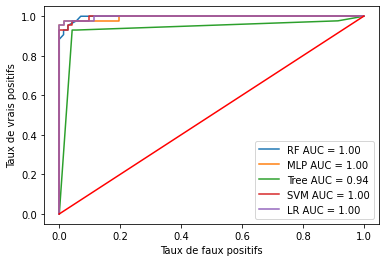

In [53]:
for method in enumerate(listMethod):
    probas_ = method[1][1].fit(X_train, y_train).predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probas_)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,label="%s AUC = %0.2f"% (method[1][0], roc_auc))
plt.plot([0, 1], [0, 1], 'r-')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc="best")
plt.show()


In [54]:
from sklearn.utils import check_random_state
import time
check_random_state(13)
tps0=time.perf_counter()
# définition des estimateurs
LR= LogisticRegression()
tree = DecisionTreeClassifier()
nnet = MLPClassifier(max_iter=600)
rf   = RandomForestClassifier(n_estimators=100)
svm  = SVC()
# Nombre d'itérations
B=3 # pour exécuter après le test, mettre plutôt B=30
# définition des grilles de paramètres
listMethGrid=[[svm,{"C":[0.4,0.5,0.6,0.8,1,1.4]}],
    [rf,{"max_features":list(range(2,10,2))}],
    [nnet,{"hidden_layer_sizes":list([(5,),(6,),(7,),(8,), (9,), (10,)])}],
    [tree,{"max_depth":list(range(2,10))}],
    [LR,{"C":[0.5,1,5,10,12,15,30]}]]
# Initialisation à 0 des erreurs pour chaque méthode (colonne) et chaque itération (ligne)
arrayErreur=np.empty((B,5))
for i in range(B):   # itérations sur B échantillons test
    # extraction apprentissage et test
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    # Meme transformation sur le test
    X_test = scaler.transform(X_test)
    # optimisation de chaque méthode et calcul de l'erreur sur le test
    for j,(method, grid_list) in enumerate(listMethGrid):
        methodGrid=GridSearchCV(method,grid_list,cv=10,n_jobs=-1
                               ).fit(X_train, y_train)
        methodOpt = methodGrid.best_estimator_
        methFit=methodOpt.fit(X_train, y_train)
        arrayErreur[i,j]=1-methFit.score(X_test,y_test)
tps1=time.perf_counter()
print("Temps execution en mn :",(tps1 - tps0))
dataframeErreur=pd.DataFrame(arrayErreur,columns=["SVM","RF","MLP","Tree","LR"])

Temps execution en mn : 93.04594886799896


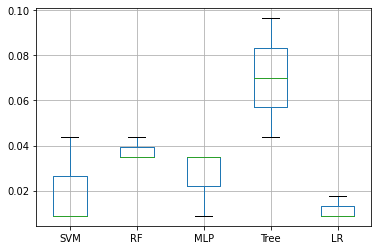

In [55]:
# Distribution des erreurs de prévisions
# Les SVM présentant des erreurs atypiques sont laissés de côté.
dataframeErreur[["SVM","RF","MLP","Tree","LR"]].boxplot(return_type='dict')
plt.show()

In [56]:
# Moyennes
dataframeErreur.mean()

SVM     0.020468
RF      0.038012
MLP     0.026316
Tree    0.070175
LR      0.011696
dtype: float64